### Measuring energy at various "time slices"

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import sem #standard error

In [95]:
# Store average of observables as measured wrt various tau slices
V_slices = []
K_slices = []
E_slices = []
N_slices = []
tau_slices = []

# Specify the target number of particles and chemical potential
N_target = 2
mu = -2.4
correction = mu*N_target

In [90]:
# Iterate over .dat files in the TauSliceData directory
directory = r'resolved'
for filename in os.listdir(directory):
        
    if filename.endswith(".dat"):
        
        # Load V,K,E,N data at each tau_slice
        data = np.loadtxt(os.path.join(directory, filename))
        
        # Save canonical data
        V_canonical = []
        K_canonical = []
        E_canonical = []
        for i,N in enumerate(data[:,3]):
            if round(N,8) == N_target: # Canonical
            #if 1: # Grand Canonical

#                 V_canonical.append(data[:,0][i]+correction)
#                 K_canonical.append(data[:,1][i])
#                 E_canonical.append(data[:,2][i]+correction)
                
                V_canonical.append(data[:,0][i])
                K_canonical.append(data[:,1][i])
                E_canonical.append(data[:,2][i])

        V_canonical = np.array(V_canonical[:])
        K_canonical = np.array(K_canonical[:])
        E_canonical = np.array(E_canonical[:])

        # Take the average of all the energies for that tau_slice measure
        V_mean = np.mean(V_canonical)
        K_mean = np.mean(K_canonical[:])
        E_mean = np.mean(E_canonical)
        
        # Calculate standard error
        V_std = sem(V_canonical)
        K_std = sem(K_canonical)
        E_std = sem(E_canonical)

        # Extract the tau_slice at which measurement was done
        L,N,U,mu,t,eta,beta,tau_slice,mc_steps,ensemble = os.path.join(directory, filename).split("_")
        tau_slices.append(float(tau_slice))
        
        # Append to list for plotting later
        tau_slice = float(tau_slice)
        V_slices.append((tau_slice,V_mean,V_std))
        K_slices.append((tau_slice,K_mean,K_std))
        E_slices.append((tau_slice,E_mean,E_std))
       
V_slices = sorted(V_slices)
K_slices = sorted(K_slices)
E_slices = sorted(E_slices)

# V_slices = np.array(sorted(V_slices))
# K_slices = np.array(sorted(K_slices))
# E_slices = np.array(sorted(E_slices))

/Users/ecasiano/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ecasiano/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ecasiano/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/ecasiano/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/ecasiano/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [91]:
V_slices = np.array(V_slices)
K_slices = np.array(K_slices)
E_slices = np.array(E_slices)
sorted(V_slices[:,0])

[0.5, 0.5]

In [92]:
print(filename)
L,N,U,mu,t,eta,beta,tau_slice,mc_steps,ensemble
V_std
K_mean
V_canonical[:10]
K_canonical

2_2_1.0000_1.0000_1.0000_0.2266_1.0000_0.5000_1000_canV.dat


array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

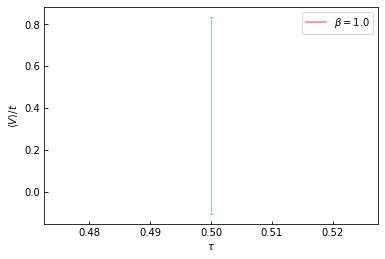

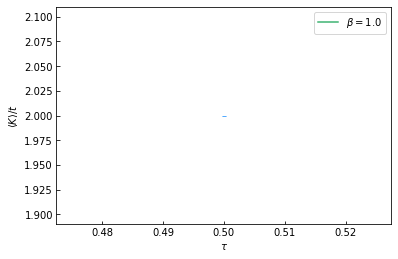

In [93]:
# Plot <V>/t,<K>/t,<E>/t as a function of tau_slice

fig, ax1 = plt.subplots()
ax1.plot(V_slices[:,0],V_slices[:,1],'-',color='lightcoral',label=r'$\beta=1.0$')
ax1.errorbar(V_slices[:,0], V_slices[:,1],marker='o',mec='dodgerblue',
                            mfc='lightskyblue',mew=0.5,alpha=1,
                            yerr=V_slices[:,2],fmt='o',
                            ecolor='dodgerblue',zorder=1,capsize=2,
                            ms=0,elinewidth=0.5)
ax1.set_ylabel(r"$\langle V \rangle / t$")
ax1.set_xlabel(r"$\tau$")
ax1.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')
plt.legend()
plt.savefig("V_slices.pdf")

fig, ax2 = plt.subplots()
ax2.plot(K_slices[:,0],K_slices[:,1],'-',color='mediumseagreen',label=r'$\beta=1.0$')
ax2.errorbar(K_slices[:,0], K_slices[:,1],marker='o',mec='dodgerblue',
                            mfc='lightskyblue',mew=0.5,alpha=1,
                            yerr=K_slices[:,2],fmt='o',
                            ecolor='dodgerblue',zorder=1,capsize=2,
                            ms=0,elinewidth=0.5)
ax2.set_ylabel(r"$\langle K \rangle / t$")
ax2.set_xlabel(r"$\tau$")
#ax2.axhline(y=-8.000000000000002,linewidth=1,color="#555555",zorder=2) # Exact <E>/t
ax2.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')
plt.legend()
plt.savefig("K_slices.pdf")

# fig, ax3 = plt.subplots()
# ax3.plot(E_slices[:,0],E_slices[:,1],'-',color='lightskyblue',label=r'$\beta=1$')
# ax3.set_ylabel(r"$\langle E \rangle / t$")
# ax3.set_xlabel(r"$\tau$")
# ax3.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')
# plt.legend()
# plt.savefig("E_slices.pdf")


# ax1.axhline(y=-8.000000000000002,linewidth=1,color="#555555",zorder=2) # Exact <E>/t
#plt.savefig("4_4_0_-2.8844_CONST_egs.pdf")
#plt.close();

In [72]:
sorted(V_slices[:,0])

[0.1, 0.2, 0.3, 0.4, 0.5, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [9]:
import numpy as np
from scipy.stats import sem
import matplotlib.pyplot as plt

### $\tau$ resolved results

In [87]:
K = {}
V = {}
E = {}

In [88]:
K['beta=1'] = np.loadtxt("resolved/2_2_1.0000_1.0000_1.0000_0.1983_1.0000_0.5000_1000000_canK.dat")
V['beta=1'] = np.loadtxt("resolved/2_2_1.0000_1.0000_1.0000_0.1983_1.0000_0.5000_1000000_canV.dat")
K['beta=2'] = np.loadtxt("resolved/2_2_1.0000_1.0000_1.0000_0.1421_2.0000_1.0000_1000000_canK.dat")
V['beta=2'] = np.loadtxt("resolved/2_2_1.0000_1.0000_1.0000_0.1421_2.0000_1.0000_1000000_canV.dat")
#K['beta=5'] = np.loadtxt("resolved/2_2_1.0000_1.0000_1.0000_0.0925_5.0000_2.5000_1000000_canK.dat")
#V['beta=5'] = np.loadtxt("resolved/2_2_1.0000_1.0000_1.0000_0.0925_5.0000_2.5000_1000000_canV.dat")
#K['beta=17'] = np.loadtxt("resolved/2_2_0.0000_0.0000_1.0000_0.2024_2.0000_1.0000_1000000_canK.dat")
#V['beta=17'] = np.loadtxt("resolved/2_2_0.0000_0.0000_1.0000_0.2024_2.0000_1.0000_1000000_canV.dat")

In [89]:
# Throw away data because of equilibration
beta_list = [1,2,5]
beta_list = [1,2]

#beta_list = [17]
for i in beta_list:
    
    label = f'beta={i}'
    
    samples = len(K[label])
    correction = 1*2

    K[label] = K[label][int(samples*0.25):]
    V[label] = V[label][int(samples*0.25):]+correction
    E[label] = K[label]+V[label]

In [90]:
K_mean = {}
V_mean = {}
E_mean = {}

K_err = {}
V_err = {}
E_err = {}

for i in beta_list:
    
    label = f'beta={i}'

    K_mean[label] = np.mean(K[label],axis=0)
    V_mean[label] = np.mean(V[label],axis=0)
    E_mean[label]= np.mean(E[label],axis=0)
    
    K_err[label] = sem(K[label],axis=0)
    V_err[label] = sem(V[label],axis=0)
    E_err[label]= sem(E[label],axis=0)

In [91]:
dtau=0.1
start = dtau
beta=1
tau_slices = []
#print(int(beta/(2*dtau)),beta,dtau)
for i in range(int(beta/(2*dtau))):
    tau_slices.append(start)
    start += 2*dtau

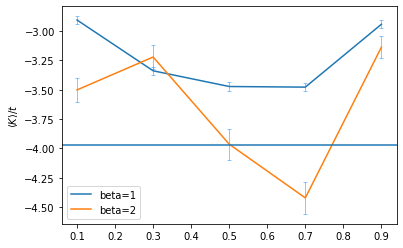

In [92]:
fig, ax1 = plt.subplots()

for i in beta_list:
    label = f'beta={i}'
    ax1.plot(tau_slices,K_mean[label],'-',label=label)
    ax1.errorbar(tau_slices,K_mean[label],marker='o',mec='dodgerblue',
                                mfc='lightskyblue',mew=0.5,alpha=1,
                                yerr=K_err[label],fmt='o',
                                ecolor='dodgerblue',zorder=1,capsize=2,
                                ms=0,elinewidth=0.5)
ax1.axhline(-3.5311-0.438)
ax1.set_ylabel(r'$\langle K \rangle /t$')
plt.legend()

In [93]:
tau_slices

[0.1, 0.30000000000000004, 0.5, 0.7, 0.8999999999999999]

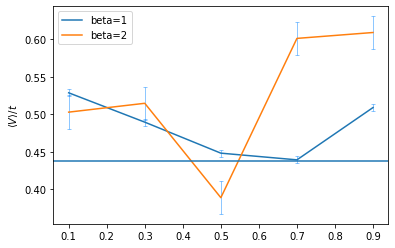

In [94]:
fig, ax1 = plt.subplots()

for i in beta_list:
    label = f'beta={i}'
    ax1.plot(tau_slices,V_mean[label],'-',label=label)
    ax1.errorbar(tau_slices,V_mean[label],marker='o',mec='dodgerblue',
                                mfc='lightskyblue',mew=0.5,alpha=1,
                                yerr=V_err[label],fmt='o',
                                ecolor='dodgerblue',zorder=1,capsize=2,
                                ms=0,elinewidth=0.5)
ax1.axhline(0.438)
ax1.set_ylabel(r'$\langle V \rangle /t$')
plt.legend()

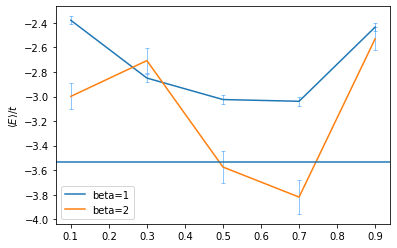

In [95]:
fig, ax1 = plt.subplots()

for i in beta_list:
    label = f'beta={i}'
    ax1.plot(tau_slices,E_mean[label],'-',label=label)
    ax1.errorbar(tau_slices,E_mean[label],marker='o',mec='dodgerblue',
                                mfc='lightskyblue',mew=0.5,alpha=1,
                                yerr=E_err[label],fmt='o',
                                ecolor='dodgerblue',zorder=1,capsize=2,
                                ms=0,elinewidth=0.5)
ax1.axhline(-3.531128874149274)
ax1.set_ylabel(r'$\langle E \rangle /t$')
plt.legend()

In [341]:
### Running averages

In [342]:
K_halfBeta = K[:,2]
K_halfBeta_cumsum = np.cumsum(K_halfBeta)
for i in range(len(K_halfBeta)):
    K_halfBeta_cumsum[i] /= (i+1)

TypeError: unhashable type: 'slice'

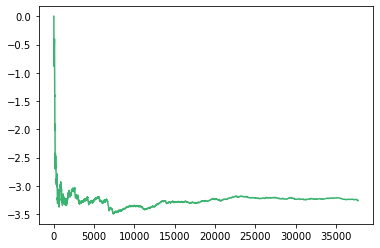

In [343]:
fig, ax4 = plt.subplots()
ax4.plot(K_halfBeta_cumsum,'-',color='mediumseagreen',label=r'$\beta=1.0$')

In [277]:
V_halfBeta = V[:,2]
V_halfBeta_cumsum = np.cumsum(V_halfBeta)
for i in range(len(V_halfBeta)):
    V_halfBeta_cumsum[i] /= (i+1)

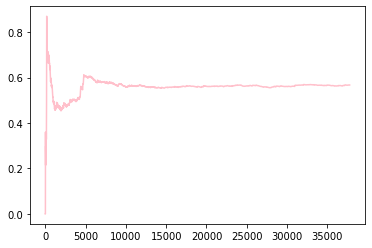

In [278]:
fig, ax5 = plt.subplots()
ax5.plot(V_halfBeta_cumsum,'-',color='pink',label=r'$\beta=1.0$')

In [265]:
E_halfBeta = E[:,2]
E_halfBeta_cumsum = np.cumsum(E_halfBeta)
for i in range(len(E_halfBeta)):
    E_halfBeta_cumsum[i] /= (i+1)

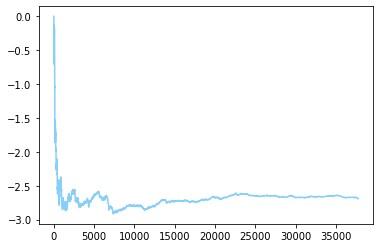

In [266]:
fig, ax5 = plt.subplots()
ax5.plot(E_halfBeta_cumsum,'-',color='lightskyblue',label=r'$\beta=1.0$')

In [332]:
len(V['beta=5'])

6287

In [331]:
len(V['beta=1'])

37765